In [1]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter5_KNN'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter5_KNN


In [2]:
import pandas as pd

iris = pd.read_excel('Iris.xls')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
iris_class = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris['species_num'] = [iris_class[i] for i in iris.iris]
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


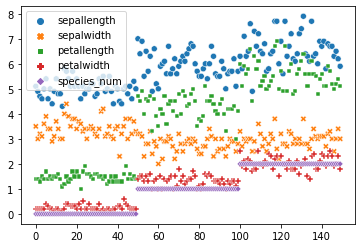

In [13]:
import seaborn as sns

sns.scatterplot(data = iris)

In [14]:
X = iris.drop(['iris', 'species_num'], axis = 1)
y = iris.species_num

In [15]:
X.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species_num, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
list_k = []
list_acc = []
list_model = []
for K_value in range(2, 9):
  list_k.append(K_value)
  clf = KNeighborsClassifier(n_neighbors = K_value)
  model = clf.fit(X_train, y_train)
  list_model.append(model)
  y_pred = model.predict(X_test)

  accur_score = accuracy_score(y_test, y_pred)
  list_acc.append(accur_score)
  print("Accuracy:", accur_score, "with K value:", K_value)

print(max(list_acc))
position = list_acc.index(max(list_acc))
k = list_k[position]

print("The optimal number of neighbors is", k, "with:", list_acc[position])

Accuracy: 1.0 with K value: 2
Accuracy: 1.0 with K value: 3
Accuracy: 1.0 with K value: 4
Accuracy: 1.0 with K value: 5
Accuracy: 1.0 with K value: 6
Accuracy: 0.9666666666666667 with K value: 7
Accuracy: 1.0 with K value: 8
1.0
The optimal number of neighbors is 2 with: 1.0


In [39]:
model = list_model[3]
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
score_train = model.score(X_train, y_train)
score_test = model.score(X_test, y_test)
print('score_train', score_train)
print('score_test', score_test)

score_train 0.9666666666666667
score_test 1.0


In [42]:
X_now = [[4.8, 3.3, 1.6, 0.25]]
y_now = model.predict(X_now)
y_now

array([0])

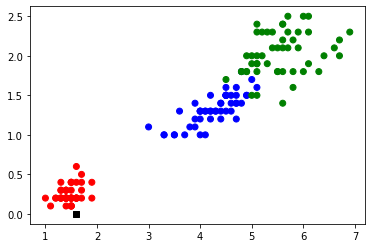

In [49]:
import matplotlib.pyplot as plt

def make_color(value):
  color = 'yellow'
  if value == 0:
    color = 'red'
  if value == 1:
    color = 'blue'
  if value == 2:
    color = 'green'
  return color

types = iris.species_num
color = [make_color(x) for x in types]
plt.scatter(iris['petallength'], iris['petalwidth'], color = color)
plt.scatter(X_now[0][2], y_now, color='k', marker='s')
plt.show()